## Redes Neurais Artificiais 2020.1

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta terceira parte do Projeto Prático 3 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [ ]:
## Reservado para a importação de bibliotecas

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as py
import plotly.graph_objects as go
import math
import random
from prettytable import PrettyTable  
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [ ]:
# Montagem do drive para o carregamento da base de dados por meio do google colab
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Leitura do dataset covtype.csv

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covtype.csv', sep=',')  # caso use google colab
# df = pd.read_csv('./covtype.csv')                                               # caso faça localmente pelo jupyter

#### Preparação dos dados

In [ ]:
# Eliminacao das colunas relativas aos atributos categoricos

atributosCategoricos = []
for i in range(40):                                                               # loop para preencher um vetor com os atributos categoricos
  if i <=3:
    atributosCategoricos.append("Wilderness_Area"+str(i+1))
  atributosCategoricos.append("Soil_Type"+str(i+1))

df = df.drop(columns=atributosCategoricos)                                        # delecao dos atributos categoricos

In [ ]:
y_alvo = df["Cover_Type"]                                                         # separacao do atributo alvo
x_preditor = df.drop(columns=["Cover_Type"])                                      # separacao dos atributos preditores

# Particao holdout para teste e treino
x_train, x_test, y_train, y_test = train_test_split(                              # Criacao das particoes para treino e teste com o auxilio da biblioteca sklearn
    x_preditor, y_alvo, test_size=0.3, train_size=0.7)

In [ ]:
# Escalonamento usando o metodo da padronização

X_train_std = (x_train - np.mean(x_train))/np.std(x_train)                        # Escalonamento do conjunto de treino 
X_test_std = (x_test - np.mean(x_train))/np.std(x_train)                          # escalonamento do conjunto de teste levando em consideracao o conjunto de treino

#### Criação e treinamento da rede neural

In [ ]:
# criacao e treino da rede neural multilayer perceptron
clf = MLPClassifier(hidden_layer_sizes=(10),activation="relu", solver="adam", 
                    random_state=1, max_iter=300, 
                    verbose=True).fit(X_train_std, y_train)

Iteration 1, loss = 0.92591820
Iteration 2, loss = 0.70723923
Iteration 3, loss = 0.68876529
Iteration 4, loss = 0.68025876
Iteration 5, loss = 0.67412817
Iteration 6, loss = 0.66988273
Iteration 7, loss = 0.66729017
Iteration 8, loss = 0.66543756
Iteration 9, loss = 0.66389991
Iteration 10, loss = 0.66283764
Iteration 11, loss = 0.66187217
Iteration 12, loss = 0.66094189
Iteration 13, loss = 0.66010021
Iteration 14, loss = 0.65948238
Iteration 15, loss = 0.65880299
Iteration 16, loss = 0.65824638
Iteration 17, loss = 0.65783200
Iteration 18, loss = 0.65745867
Iteration 19, loss = 0.65706568
Iteration 20, loss = 0.65674884
Iteration 21, loss = 0.65654777
Iteration 22, loss = 0.65634320
Iteration 23, loss = 0.65606280
Iteration 24, loss = 0.65580755
Iteration 25, loss = 0.65566029
Iteration 26, loss = 0.65553128
Iteration 27, loss = 0.65535162
Iteration 28, loss = 0.65533766
Iteration 29, loss = 0.65520549
Iteration 30, loss = 0.65506871
Iteration 31, loss = 0.65494528
Iteration 32, los

In [ ]:
# obtencao das respostas para o conjunto de teste
y_pred = clf.predict(X_test_std)

# print da matriz de confusao
matrizConfusao = confusion_matrix(y_test, y_pred)                                 # calculo da matriz de confusao

table = PrettyTable(["","1", "2", "3", "4", "5", "6", "7"])                       # Cria a tabela com as colunas de 1 a 7
table.padding_width = 1

for i in range(len(matrizConfusao)):                                              # loop para preencher a tabela com os dados
  table.add_row(np.concatenate([[str(i+1)], matrizConfusao[i]]))

print("----------------- MATRIZ DE CONFUSAO -----------------")                   # print da matriz de confusao
print(table)

print("F1-SCORE:  {}".format(round(f1_score(y_test, y_pred,                       # calculo do f-score
                                           average='macro'), 4))) 
print("ACURACIA:  {}".format(round(accuracy_score(y_test, y_pred), 4)))           # calculo da acuracia
print("PRECISION: {}".format(round(precision_score(y_test, y_pred,                # calculo da precisao
                                           average='macro'), 4)))
print("RECALL:    {}".format(round(recall_score(y_test, y_pred,                   # calculo da revocacao
                                           average='macro'), 4)))

----------------- MATRIZ DE CONFUSAO -----------------
+---+-------+-------+------+-----+-----+------+------+
|   |   1   |   2   |  3   |  4  |  5  |  6   |  7   |
+---+-------+-------+------+-----+-----+------+------+
| 1 | 43913 | 18200 |  8   |  0  |  8  |  9   | 1418 |
| 2 | 15281 | 67963 | 1156 |  0  | 100 | 475  | 103  |
| 3 |   0   |  1858 | 7512 | 131 |  0  | 1137 |  0   |
| 4 |   0   |   4   | 375  | 271 |  0  | 145  |  0   |
| 5 |   15  |  2547 |  46  |  0  | 323 |  10  |  0   |
| 6 |   0   |  1463 | 2299 |  54 |  0  | 1411 |  0   |
| 7 |  2843 |   28  |  0   |  0  |  0  |  0   | 3198 |
+---+-------+-------+------+-----+-----+------+------+
F1-SCORE:  0.5288
ACURACIA:  0.7148
PRECISION: 0.6527
RECALL:    0.4919


In [ ]:
# treinamento usando uma aboardagem de 100 repeticoes

f1scores = np.zeros(100)
acuracias = np.zeros(100)

clf = MLPClassifier(hidden_layer_sizes=(10),activation="relu", solver="adam",       # criacao da rede neural multilayer perceptron
                                                max_iter=300, verbose=False)

for i in range (100):
  x_train, x_test, y_train, y_test = train_test_split(                              # Criacao das particoes para treino e teste com o auxilio da biblioteca sklearn
    x_preditor, y_alvo, test_size=0.3, train_size=0.7)
  
  X_train_std = (x_train - np.mean(x_train))/np.std(x_train)                        # Escalonamento do conjunto de treino 
  X_test_std = (x_test - np.mean(x_train))/np.std(x_train)  

  clf.fit(X_train_std, y_train)                                                     # treino da rede neural 

  y_pred = clf.predict(X_test_std)                                                  # predicao para o conjuto de teste escalonado

  f1scores[i] = f1_score(y_test, y_pred, average='macro')                           # armazenamento do valor de f-score
  acuracias[i] = accuracy_score(y_test, y_pred)                                     # armazenamento do valor de acuracia

# calculo das medias e desvios padrao dos dados de acuracia e f-score
print("Média de acurácia:      {}".format(round(acuracias.mean(), 5)))              # print da media de acuracia
print("Desvio Padrão acurácia: {}".format(round(acuracias.std(), 5)))               # print do desvio padrao de acuracia
print("Média de F-Score:       {}".format(round(f1scores.mean(), 5)))               # print da media de F-Score
print("Desvio Padrão F-Score:  {}".format(round(f1scores.std(), 5)))                # print do desvio padrao de F-Score

Média de acurácia:      0.71554
Desvio Padrão acurácia: 0.0021
Média de F-Score:       0.51661
Desvio Padrão F-Score:  0.01065


#### Treinamento da rede neural anterior levando em consideracao o **SOLVER** sendo ***SGD***

In [ ]:
# treinamento da rede anterior usando o solver sendo sgd

f1scores = np.zeros(100)
acuracias = np.zeros(100)

clf = MLPClassifier(hidden_layer_sizes=(10),activation="relu", solver="sgd",        # criacao da rede neural com o solver sendo sgd
                                                max_iter=300, verbose=False)

for i in range (100):
  x_train, x_test, y_train, y_test = train_test_split(                              # Criacao das particoes para treino e teste com o auxilio da biblioteca sklearn
    x_preditor, y_alvo, test_size=0.3, train_size=0.7)
  
  X_train_std = (x_train - np.mean(x_train))/np.std(x_train)                        # Escalonamento do conjunto de treino 
  X_test_std = (x_test - np.mean(x_train))/np.std(x_train)  

  clf.fit(X_train_std, y_train)                                                     # treino da rede neural 

  y_pred = clf.predict(X_test_std)                                                  # predicao para o conjuto de teste escalonado

  f1scores[i] = f1_score(y_test, y_pred, average='macro')                           # armazenamento do valor de f-score
  acuracias[i] = accuracy_score(y_test, y_pred)                                     # armazenamento do valor de acuracia

print("media acuracia:          {}".format(round(acuracias.mean(), 5)))             # print da media de acuracia
print("desvio padrao acuracia:  {}".format(round(acuracias.std(), 5)))              # print do desvio padrao de acuracia
print("media f-score:           {}".format(round(f1scores.mean(), 5)))              # print da media de F-Score
print("desvio padrao f-score:   {}".format(round(f1scores.std(), 5)))               # print do desvio padrao de F-Score

media acuracia:          0.7147
desvio padrao acuracia:  0.00301
media f-score:           0.48194
desvio padrao f-score:   0.01792


### Houve influência da escolha do otimizador no desempenho da rede?

***Sim***, como foi visto a partir dos dados de média e desvio padrão sobre a acurácia e o F-Score com os hiperparâmetros *solver* `adam` e `sgd`.  
O modelo que teve o *solver* sendo adam se saiu levemente melhor, obtendo uma maior pontuação para média de f-score e ligeiramente melhor para média de acurácia também.

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

#### Criação das 10 configurações para as redes neurais

In [ ]:
funcaoAtivação = ["identity", "logistic", "tanh", "relu"]                         # declaracao do vetor com os tipos de funcao de ativacao
hiperParametro = ["adam", "sgd"]                                                  # declaracao do vetor com o tipo do hiperparametro solver
epocas = [100, 150, 200]                                                          # declaracao do vetor com a quanitdade de epocas
camadas = [1, 2]
configuracoes = []                                                                # declaracao do vetor que armazenara as configuracoes geradas

for i in range (10):                                                              # loop para gerar aleatoriamente as configuracoes (dentro do especificado)
  tipoEpoca = random.randrange(1, 1000000, 1)%3
  tipoHiperParametro = random.randrange(1, 1000000, 1)%2
  tipoFuncaoAtivacao = random.randrange(1, 1000000, 1)%4
  xqtdCamadas = random.randrange(1, 1000000, 1)%2
  qtdNeuronios = random.randrange(1, 20, 1)
  
  aux = random.randrange(1, qtdNeuronios, 1)                                      # variavel auxiliar
  disposicaoNeuronios = qtdNeuronios if camadas[xqtdCamadas]==1 else (aux, 
                                                        qtdNeuronios-aux)         # disposicao dos neuronios nas 2 camadas ocultas

  configuracoes.append({                                                          # armazenamento das configuracoes geradas
    "camadasOcultas": camadas[xqtdCamadas],
    "funcaoAtivacao": funcaoAtivação[tipoFuncaoAtivacao],
    "hiperparametro": hiperParametro[tipoHiperParametro],
    "epocas": epocas[tipoEpoca],
    "neuronios": qtdNeuronios,
    "disposicaoNeuronios": disposicaoNeuronios
  })

#### Apresentação das configurações de redes geradas

In [ ]:
table = PrettyTable(["Quantidade de camadas","Função de ativação",                  # Criacao da tabela
                      "Hiperparametro", "Quantidade de épocas", 
                      "Quantidade de neurônios", "Disposição dos neurônios"])        

table.padding_width = 1

for i in configuracoes:                                                           # loop para preencher a tabela com os dados
  table.add_row([i["camadasOcultas"], i["funcaoAtivacao"], i["hiperparametro"],
                i["epocas"], i["neuronios"], i["disposicaoNeuronios"]])

# print da tabela com as configuracoes geradas
print("----------------------------------------------------- CONFIGURAÇÕES DAS REDES NEURAIS -----------------------------------------------------")
print(table)

----------------------------------------------------- CONFIGURAÇÕES DAS REDES NEURAIS -----------------------------------------------------
+-----------------------+--------------------+----------------+----------------------+-------------------------+--------------------------+
| Quantidade de camadas | Função de ativação | Hiperparametro | Quantidade de épocas | Quantidade de neurônios | Disposição dos neurônios |
+-----------------------+--------------------+----------------+----------------------+-------------------------+--------------------------+
|           1           |        tanh        |      sgd       |         150          |            11           |            11            |
|           1           |        tanh        |      adam      |         100          |            8            |            8             |
|           1           |        tanh        |      sgd       |         150          |            13           |            13            |
|           1       

#### Treinamento das redes com os parâmetros listados acima

In [ ]:
# treinamento das 10 configuracoes geradas anteriormente

melhoresMatrizes = []                                                             # vetor para armazenas as matrizes de confusao de acordo com o melhor desempenho
desempenhoGeral = []                                                              # vetor para armazenar o desempenho de cada rede em termos de media de f-score e acuracia
melhorDesempenhoIndividual = []                                                   # vetor para armazenar o melhor resultado de cada rede
cont=0                                                                            # contador para marcar a posicao de cada rede na lista

for i in configuracoes:                                                           # loop para o treinamento de cada configuracao de rede
    cont+=1
    f1scores = np.zeros(10)                                                       # incializacao do vetor de f-score com 0
    acuracias = np.zeros(10)                                                      # inicializacao do vetor de acuracia com 0

    clf = MLPClassifier(hidden_layer_sizes=(i["disposicaoNeuronios"]),            # criacao da rede neural de acordo com a configuracao em questao
                            activation=i["funcaoAtivacao"], 
                            solver=i["hiperparametro"], 
                            max_iter=i["epocas"], 
                            verbose=False)

    for j in range(100):                                                          # loop para repetir o treinamento mais de 1 vez
        x_train, x_test, y_train, y_test = train_test_split(
            x_preditor, y_alvo, test_size=0.3, train_size=0.7)                    # criacao da particao holdout 70%(treino) - 30%(teste)
        
        X_train_std = (x_train - np.mean(x_train))/np.std(x_train)                # Escalonamento da particao de treino 
        X_test_std = (x_test - np.mean(x_train))/np.std(x_train)                  # escalonamento da particao de teste levando em consideracao a particao de treino

        clf.fit(X_train_std, y_train)                                             # treino da rede

        y_pred = clf.predict(X_test_std)                                          # predicao para a particao de teste

        f1scores[j] = f1_score(y_test, y_pred, average='macro')                   # calculo e armazenamento do f-score
        acuracias[j] = accuracy_score(y_test, y_pred)                             # calculo e armazenamento da acuracia

        if j == 0:                                                                # logica para armazenar os melhores valores para matriz de confusao, acuracia e f-score
          melhorDesempenhoIndividual.append({
              "acuracia": acuracias[j],
              "fscore": f1scores[j]
          })
          melhoresMatrizes.append(confusion_matrix(y_test, y_pred))
        else:
          if acuracias[j] >= melhorDesempenhoIndividual[cont-1]["acuracia"]:
            if  acuracias[j] == melhorDesempenhoIndividual[cont-1]["acuracia"]:
              if f1scores[j] > melhorDesempenhoIndividual[cont-1]["fscore"]:
                melhorDesempenhoIndividual[cont-1]["fscore"] = f1scores[j]
                melhorDesempenhoIndividual[cont-1]["acuracia"] = acuracias[j]
                melhoresMatrizes[cont-1] = confusion_matrix(y_test, y_pred)
            else:
              melhorDesempenhoIndividual[cont-1]["fscore"] = f1scores[j]
              melhorDesempenhoIndividual[cont-1]["acuracia"] = acuracias[j]
              melhoresMatrizes[cont-1] = confusion_matrix(y_test, y_pred)

    desempenhoGeral.append({                                                      # armazenamento da media para o valor de acuracia e f-score para as repeticoes
        "configuracao": cont,
        "media": round(acuracias.mean(), 5),
        "fscore": round(f1scores.mean(), 5)
    })

In [ ]:
# print das top3 melhores redes com relacao a f-score e acuracia

sorted_list = sorted(desempenhoGeral, key=lambda k: k['media'])                   # ordenacao do vetor em ordem crescente de media para acuracia
primeiro = sorted_list[9]                                                         # extracao da melhor rede
segundo = sorted_list[8]                                                          # extracao da segunda melhor rede
terceiro = sorted_list[7]                                                         # extracao da terceira melhor rede

table = PrettyTable(["", "Camadas","Função de ativação",                          # Criacao da tabela
                      "Hiperparametro", "Épocas", 
                      "Quantidade de neurônios", "Disposição dos neurônios", 
                     "Média acuracia", "Média F-Score"])        

table.padding_width = 1

# preenchimento dos dados da table (3 melhores desempenhos)
table.add_row(["1°", configuracoes[primeiro["configuracao"]-1]["camadasOcultas"], # preenchimento da posicao numero 1
               configuracoes[primeiro["configuracao"]-1]["funcaoAtivacao"], 
               configuracoes[primeiro["configuracao"]-1]["hiperparametro"], 
               configuracoes[primeiro["configuracao"]-1]["epocas"], 
               configuracoes[primeiro["configuracao"]-1]["neuronios"], 
               configuracoes[primeiro["configuracao"]-1]["disposicaoNeuronios"],
               primeiro["media"], primeiro["fscore"]])
table.add_row(["2°", configuracoes[segundo["configuracao"]-1]["camadasOcultas"], # preenchimento da posicao numero 2
               configuracoes[segundo["configuracao"]-1]["funcaoAtivacao"], 
               configuracoes[segundo["configuracao"]-1]["hiperparametro"], 
               configuracoes[segundo["configuracao"]-1]["epocas"], 
               configuracoes[segundo["configuracao"]-1]["neuronios"], 
               configuracoes[segundo["configuracao"]-1]["disposicaoNeuronios"],
               segundo["media"], segundo["fscore"]])
table.add_row(["3°", configuracoes[terceiro["configuracao"]-1]["camadasOcultas"], # preenchimento da posicao numero 3
               configuracoes[terceiro["configuracao"]-1]["funcaoAtivacao"], 
               configuracoes[terceiro["configuracao"]-1]["hiperparametro"], 
               configuracoes[terceiro["configuracao"]-1]["epocas"], 
               configuracoes[terceiro["configuracao"]-1]["neuronios"], 
               configuracoes[terceiro["configuracao"]-1]["disposicaoNeuronios"],
               terceiro["media"], terceiro["fscore"]])

print("---------------------------------------------------------- CONFIGURAÇÕES DAS REDES NEURAIS ----------------------------------------------------------")
print(table)

# Print das matrizes de confusao das melhores configuracões
print("------------- Primeiro Colocado ------------")
print(melhoresMatrizes[primeiro["configuracao"]-1])

print("\n------------- Segundo Colocado -------------")
print(melhoresMatrizes[segundo["configuracao"]-1])

print("\n------------- Terceiro Colocado ------------")
print(melhoresMatrizes[terceiro["configuracao"]-1])

---------------------------------------------------------- CONFIGURAÇÕES DAS REDES NEURAIS ----------------------------------------------------------
+----+---------+--------------------+----------------+--------+-------------------------+--------------------------+----------------+---------------+
|    | Camadas | Função de ativação | Hiperparametro | Épocas | Quantidade de neurônios | Disposição dos neurônios | Média acuracia | Média F-Score |
+----+---------+--------------------+----------------+--------+-------------------------+--------------------------+----------------+---------------+
| 1° |    1    |      logistic      |      adam      |  200   |            15           |            15            |    0.73191     |    0.54205    |
| 2° |    1    |        tanh        |      sgd       |  150   |            13           |            13            |    0.72023     |    0.47931    |
| 3° |    1    |        tanh        |      sgd       |  150   |            11           |           

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_h$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

### 1. Consulte a documentação da classe MLPClassifier e obtenha os valores de  Ni e Nh  
Como o texto acima indica e segundo a documentação da biblioteca `sklearn.neural_network.MLPClassifier` informa, os valores para **Ni**, **No** estão relacionados a quantidade de atributos preditores e quantidade de classes respectivamente. Sendo assim, ambos correspondem respectivamente a **10** e **7**.


### 2 e 3. Criação das 30 configuracoes para as redes neurais

In [ ]:
# Atribuicao dos parametros da regra da piramide geometrica
Ni = 10
No = 7
alpha = [0.5, 2, 3]
Nh = [] 

for a in alpha:
  Nh.append(int(a*math.sqrt(Ni*No))) 

# print(Nh)
# proposicao das 30 redes neurais usando a regra da pirameide para a quantidade de neuronios
funcaoAtivação = ["identity", "logistic", "tanh", "relu"]                         # declaracao do vetor com os tipos de funcao de ativacao
hiperParametro = ["adam", "sgd"]                                                  # declaracao do vetor com o tipo do hiperparametro solver
epocas = [100, 150, 200]                                                          # declaracao do vetor com a quanitdade de epocas
camadas = [1, 2]
configuracoes = []                                                                # declaracao do vetor que armazenara as configuracoes geradas

for i in range (30):                                                              # loop para gerar aleatoriamente as configuracoes (dentro do especificado)
  tipoEpoca = random.randrange(1, 1000000, 1)%3
  tipoHiperParametro = random.randrange(1, 1000000, 1)%2
  tipoFuncaoAtivacao = random.randrange(1, 1000000, 1)%4
  xqtdCamadas = random.randrange(1, 1000000, 1)%2
  qtdNeuronios = random.randrange(1, 1000000, 1)%3
  
  aux = random.randrange(1, Nh[qtdNeuronios], 1)                                  # variavel auxiliar
  disposicaoNeuronios = Nh[qtdNeuronios] if camadas[xqtdCamadas]==1 else (aux, 
                                                        Nh[qtdNeuronios]-aux)     # disposicao dos neuronios nas 2 camadas ocultas

  configuracoes.append({                                                          # armazenamento das configuracoes geradas
    "camadasOcultas": camadas[xqtdCamadas],
    "funcaoAtivacao": funcaoAtivação[tipoFuncaoAtivacao],
    "hiperparametro": hiperParametro[tipoHiperParametro],
    "epocas": epocas[tipoEpoca],
    "neuronios": Nh[qtdNeuronios],
    "disposicaoNeuronios": disposicaoNeuronios
  })

#### Exibição das configuracões das 30 redes propostas

In [ ]:
table = PrettyTable(["Camadas","Função de ativação",                              # Criacao da tabela
                      "Hiperparametro", "Épocas", 
                      "Quantidade de neurônios", "Disposição dos neurônios"])        

table.padding_width = 1

for i in configuracoes:                                                           # loop para preencher a tabela com os dados
  table.add_row([i["camadasOcultas"], i["funcaoAtivacao"], i["hiperparametro"],
                i["epocas"], i["neuronios"], i["disposicaoNeuronios"]])

print("--------------------------------------- CONFIGURAÇÕES DAS REDES NEURAIS ---------------------------------------")
print(table)

--------------------------------------- CONFIGURAÇÕES DAS REDES NEURAIS ---------------------------------------
+---------+--------------------+----------------+--------+-------------------------+--------------------------+
| Camadas | Função de ativação | Hiperparametro | Épocas | Quantidade de neurônios | Disposição dos neurônios |
+---------+--------------------+----------------+--------+-------------------------+--------------------------+
|    1    |      logistic      |      adam      |  200   |            4            |            4             |
|    2    |        relu        |      adam      |  150   |            25           |         (4, 21)          |
|    2    |      identity      |      sgd       |  200   |            25           |         (20, 5)          |
|    1    |        tanh        |      adam      |  150   |            16           |            16            |
|    1    |        tanh        |      sgd       |  150   |            4            |            4       

#### Criação e treinamento das redes neurais propostas acima

In [ ]:
# treinamento das 10 configuracoes geradas anteriormente

melhoresMatrizes = []                                                             # vetor para armazenas as matrizes de confusao de acordo com o melhor desempenho
desempenhoGeral = []                                                              # vetor para armazenar o desempenho de cada rede em termos de media de f-score e acuracia
melhorDesempenhoIndividual = []                                                   # vetor para armazenar o melhor resultado de cada rede
cont=0                                                                            # contador para marcar a posicao de cada rede na lista

for i in configuracoes:                                                           # loop para o treinamento de cada configuracao de rede
    cont+=1
    f1scores = np.zeros(10)                                                       # incializacao do vetor de f-score com 0
    acuracias = np.zeros(10)                                                      # inicializacao do vetor de acuracia com 0

    clf = MLPClassifier(hidden_layer_sizes=(i["disposicaoNeuronios"]),            # criacao da rede neural de acordo com a configuracao em questao
                            activation=i["funcaoAtivacao"], 
                            solver=i["hiperparametro"], 
                            max_iter=i["epocas"], 
                            verbose=False)

    for j in range(10):                                                          # loop para repetir o treinamento mais de 1 vez
        x_train, x_test, y_train, y_test = train_test_split(
            x_preditor, y_alvo, test_size=0.3, train_size=0.7)                    # criacao da particao holdout 70%(treino) - 30%(teste)
        
        X_train_std = (x_train - np.mean(x_train))/np.std(x_train)                # Escalonamento da particao de treino 
        X_test_std = (x_test - np.mean(x_train))/np.std(x_train)                  # escalonamento da particao de teste levando em consideracao a particao de treino

        clf.fit(X_train_std, y_train)                                             # treino da rede

        y_pred = clf.predict(X_test_std)                                          # predicao para a particao de teste

        f1scores[j] = f1_score(y_test, y_pred, average='macro')                   # calculo e armazenamento do f-score
        acuracias[j] = accuracy_score(y_test, y_pred)                             # calculo e armazenamento da acuracia

        if j == 0:                                                                # logica para armazenar os melhores valores para matriz de confusao, acuracia e f-score
          melhorDesempenhoIndividual.append({
              "acuracia": acuracias[j],
              "fscore": f1scores[j]
          })
          melhoresMatrizes.append(confusion_matrix(y_test, y_pred))
        else:
          if acuracias[j] >= melhorDesempenhoIndividual[cont-1]["acuracia"]:
            if  acuracias[j] == melhorDesempenhoIndividual[cont-1]["acuracia"]:
              if f1scores[j] > melhorDesempenhoIndividual[cont-1]["fscore"]:
                melhorDesempenhoIndividual[cont-1]["fscore"] = f1scores[j]
                melhorDesempenhoIndividual[cont-1]["acuracia"] = acuracias[j]
                melhoresMatrizes[cont-1] = confusion_matrix(y_test, y_pred)
            else:
              melhorDesempenhoIndividual[cont-1]["fscore"] = f1scores[j]
              melhorDesempenhoIndividual[cont-1]["acuracia"] = acuracias[j]
              melhoresMatrizes[cont-1] = confusion_matrix(y_test, y_pred)

    desempenhoGeral.append({                                                      # armazenamento da media para o valor de acuracia e f-score para as repeticoes
        "configuracao": cont,
        "media": round(acuracias.mean(), 5),
        "fscore": round(f1scores.mean(), 5)
    })

In [ ]:
# print das top3 melhores redes com relacao a f-score e acuracia

sorted_list = sorted(desempenhoGeral, key=lambda k: k['media'])                   # ordenacao do vetor em ordem crescente de media para acuracia
primeiro = sorted_list[29]                                                        # extracao da melhor rede
segundo = sorted_list[28]                                                         # extracao da segunda melhor rede
terceiro = sorted_list[27]                                                        # extracao da terceira melhor rede

table = PrettyTable(["", "Camadas","Função de ativação",                          # Criacao da tabela
                      "Hiperparametro", "Épocas", 
                      "Quantidade de neurônios", "Disposição dos neurônios", 
                     "Média acuracia", "Média F-Score"])        

table.padding_width = 1

# preenchimento dos dados da table (3 melhores desempenhos)
table.add_row(["1°", configuracoes[primeiro["configuracao"]-1]["camadasOcultas"], # preenchimento da posicao numero 1
               configuracoes[primeiro["configuracao"]-1]["funcaoAtivacao"], 
               configuracoes[primeiro["configuracao"]-1]["hiperparametro"], 
               configuracoes[primeiro["configuracao"]-1]["epocas"], 
               configuracoes[primeiro["configuracao"]-1]["neuronios"], 
               configuracoes[primeiro["configuracao"]-1]["disposicaoNeuronios"],
               primeiro["media"], primeiro["fscore"]])
table.add_row(["2°", configuracoes[segundo["configuracao"]-1]["camadasOcultas"],  # preenchimento da posicao numero 2
               configuracoes[segundo["configuracao"]-1]["funcaoAtivacao"], 
               configuracoes[segundo["configuracao"]-1]["hiperparametro"], 
               configuracoes[segundo["configuracao"]-1]["epocas"], 
               configuracoes[segundo["configuracao"]-1]["neuronios"], 
               configuracoes[segundo["configuracao"]-1]["disposicaoNeuronios"],
               segundo["media"], segundo["fscore"]])
table.add_row(["3°", configuracoes[terceiro["configuracao"]-1]["camadasOcultas"], # preenchimento da posicao numero 3
               configuracoes[terceiro["configuracao"]-1]["funcaoAtivacao"], 
               configuracoes[terceiro["configuracao"]-1]["hiperparametro"], 
               configuracoes[terceiro["configuracao"]-1]["epocas"], 
               configuracoes[terceiro["configuracao"]-1]["neuronios"], 
               configuracoes[terceiro["configuracao"]-1]["disposicaoNeuronios"],
               terceiro["media"], terceiro["fscore"]])

print("---------------------------------------------------------- CONFIGURAÇÕES DAS REDES NEURAIS ----------------------------------------------------------")
print(table)

# Print das matrizes de confusao das melhores configuracões
print("------------- Primeiro Colocado ------------")
print(melhoresMatrizes[primeiro["configuracao"]-1])

print("\n------------- Segundo Colocado -------------")
print(melhoresMatrizes[segundo["configuracao"]-1])

print("\n------------- Terceiro Colocado ------------")
print(melhoresMatrizes[terceiro["configuracao"]-1])

---------------------------------------------------------- CONFIGURAÇÕES DAS REDES NEURAIS ----------------------------------------------------------
+----+---------+--------------------+----------------+--------+-------------------------+--------------------------+----------------+---------------+
|    | Camadas | Função de ativação | Hiperparametro | Épocas | Quantidade de neurônios | Disposição dos neurônios | Média acuracia | Média F-Score |
+----+---------+--------------------+----------------+--------+-------------------------+--------------------------+----------------+---------------+
| 1° |    1    |        tanh        |      adam      |  150   |            25           |            25            |    0.74959     |    0.60096    |
| 2° |    1    |      logistic      |      adam      |  100   |            25           |            25            |    0.74573     |    0.58238    |
| 3° |    2    |      logistic      |      adam      |  200   |            25           |         (2

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

In [ ]:
# criacao do vetor com as  melhores configuracoes da arquitetura propria
top3_arquitetura = []
top3_piramide = []

# preenchimento do vetor com as 3 melhores configuracoes da arquitetura propria
top3_arquitetura.append({                                                          
    "camadasOcultas": 1,"funcaoAtivacao": "logistic", "hiperparametro": "adam",
    "epocas": 200, "neuronios": 15, "disposicaoNeuronios": 15
  })
top3_arquitetura.append({                                                          
    "camadasOcultas": 1, "funcaoAtivacao": "tanh", "hiperparametro": "sgd",
    "epocas": 200, "neuronios": 13, "disposicaoNeuronios": 13
  })
top3_arquitetura.append({                                                          
    "camadasOcultas": 1, "funcaoAtivacao": "tanh", "hiperparametro": "sgd",
    "epocas": 200, "neuronios": 11, "disposicaoNeuronios": 11
  })

# preenchimento do vetor com as 3 melhores configuracoes da arquitetura priramide
top3_piramide.append({                                                          
    "camadasOcultas": 1,"funcaoAtivacao": "tanh", "hiperparametro": "adam",
    "epocas": 200, "neuronios": 25, "disposicaoNeuronios": 25
  })
top3_piramide.append({                                                          
    "camadasOcultas": 1, "funcaoAtivacao": "logistic", "hiperparametro": "adam",
    "epocas": 200, "neuronios": 25, "disposicaoNeuronios": 25
  })
top3_piramide.append({                                                          
    "camadasOcultas": 2, "funcaoAtivacao": "logistic", "hiperparametro": "adam",
    "epocas": 200, "neuronios": 25, "disposicaoNeuronios": (22, 3)
  })

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covtype.csv', sep=',')  # leitura do dataset com todos os atributos
y_alvo = df["Cover_Type"]                                                         # separacao do atributo alvo
x_preditor = df.drop(columns=["Cover_Type"])                                      # separacao dos atributos preditores

top_6 = []                                                                        # Vetor dos top 6
top_6 = top3_arquitetura + top3_piramide                                          # soma do vetor de arquitetura proprie e de piramide geometrica

ranking_top6 = []                                                                 # inicializacao do vetor com o raking das configuracoes
fscore_top6 = []                                                                  # inicializacao do vetor com o f-score para cada configuracao
acuracia_top6 = []                                                                # inicializacao do vetor com a acuracia para cada configuracao
cont=0
for i in top_6:                                                                   # loop para cada configuracao
    fscore_top6.append([])
    acuracia_top6.append([])
    cont+=1
    f1scores = np.zeros(10)
    acuracias = np.zeros(10)

    clf = MLPClassifier(hidden_layer_sizes=(i["disposicaoNeuronios"]),
                            activation=i["funcaoAtivacao"], 
                            solver=i["hiperparametro"], 
                            max_iter=200, #sao 200 epocas 
                            verbose=False)
    for j in range(10):
        x_train, x_test, y_train, y_test = train_test_split(                      # Criacao das particoes para treino e teste com o auxilio da biblioteca sklearn
            x_preditor, y_alvo, test_size=0.3, train_size=0.7)
        
        clf.fit(x_train, y_train)                                                 # treino da rede

        y_pred = clf.predict(x_test)                                              # predicao para a particao de teste

        fscore_top6[cont - 1].append(f1_score(y_test, y_pred, average='macro'))   # Calcula o fscore e coloca no score do top6
        acuracia_top6[cont - 1].append(accuracy_score(y_test, y_pred))            # Calcula a acuracia e coloca no score do top6

    ranking_top6.append({                                                         # armazenamento do resultado para media e desvio padrao de acuracia e f-score
        "configuracao": cont,
        "mediaAcuracia": np.mean(acuracia_top6[cont-1]),
        "desvioacuracia": np.std(acuracia_top6[cont-1]),
        "mediafscore": np.mean(fscore_top6[cont-1]),
        "desvioFscore": np.std(fscore_top6[cont-1])
    })

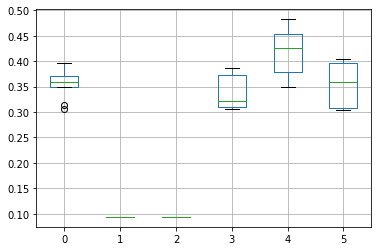

In [ ]:
# plot do boxplot para fs-score

boxplot_top6 = pd.DataFrame(fscore_top6)                                          # pegar o fscore e botar num dataframe
boxplot_top6 = boxplot_top6.transpose()                                           # arrumar o dataframe
 
boxplot_top6.boxplot()                                                            # plotar em um boxplot

In [ ]:
table = PrettyTable(["Indice da configuração", "Média acuracia",                  # Criacao da tabela
                     "Desvio acuracia", "Média F-Score", "Desvio F-Score"])        
cont = 0
table.padding_width = 1

for i in ranking_top6:                                                            # preecnhimento dos dados na tabela
  cont+=1
  table.add_row([cont, round(i["mediaAcuracia"],5), 
                       round(i["desvioacuracia"],5),
                       round(i["mediafscore"],5), 
                       round(i["desvioFscore"], 5)])
  
print("------------------------------ CONFIGURAÇÕES DAS REDES NEURAIS -------------------------------")
print(table)

------------------------------ CONFIGURAÇÕES DAS REDES NEURAIS -------------------------------
+------------------------+----------------+-----------------+---------------+----------------+
| Indice da configuração | Média acuracia | Desvio acuracia | Média F-Score | Desvio F-Score |
+------------------------+----------------+-----------------+---------------+----------------+
|           1            |    0.69924     |     0.01157     |    0.35566    |    0.02693     |
|           2            |    0.48741     |     0.00094     |    0.09363    |    0.00012     |
|           3            |     0.4877     |     0.00057     |    0.09366    |     7e-05      |
|           4            |    0.69278     |     0.01075     |    0.33883    |    0.03276     |
|           5            |    0.70932     |     0.00783     |    0.41649    |    0.04528     |
|           6            |    0.70581     |     0.00941     |    0.35385    |    0.04163     |
+------------------------+----------------+-------

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?

**1.**   

***Sim.***  
De acordo com as execuções das redes neurais feitas por esse projeto, existem redes que possuem melhores acurácias e melhores F-Scores do que outras, enquanto algumas redes se estagnaram, outras tiveram resultados levemente superiores, obtendo assim melhores resultados para suas médias.  
No entanto pode-se dizer que todas as redes obtiveram um desempenho de certa forma similar, não se diferenciando em mais de 10% umas das outras.  

***
**2.**  

Como é possivel ver na tabela acima, que consta as 6 melhores configurações encontradas, é possível perceber que as configurações de índice 4, 5, 6 (que foram obtidas pela regra da **pirâmide geométrica**) foram **superiores** no quesito de média de *F-Score* e *Acurácia*.  
Sendo assim, pode-se afirmar que a regra da pirâmide geométrica é mais eficiente que uma escolha aleatória, que foi a utilizada na estratégia própria.

Isso pode ser justificado pelo fato de a regra da pirâmide geometrica tentar encontrar um "meio termo" entre a quantidade de neurônios para uma rede ja que usar poucos neurônios nas camadas ocultas pode resultar em algo chamado *underfitting* que é quando há poucos neurônios nas camadas ocultas para detectar adequadamente os sinais em um conjunto de dados. No entanto aumentar muito a quantidade de neuronios pode resultar em algo chamado *overfitting* que é quando ocorre de a rede neural ter muita capacidade de processamento de informações que a base de dados não é capaz de suprir essas informações, sendo assim, uma escolha randomica pode cair em um desses problemas e a regra da piramide geometrica visa fazer uso de parametros da rede para gerar esse valor para quantidade de neurônios podendo esse ser o fator para sua leve superioridade sobre o outro método.

***
**3.**

Para os treinos executados, a utilização dos atributos categóricos **piorou** em relação a não utilização dos mesmos.  
Isso pode ser facilmente visualizado ao se comparar os resultados obtidos nas execuções anteriores, por exemplo, a melhor configuração de rede, usando a pirâmide geométrica, teve um score de ***0.74*** para acurácia sem o uso dos atributos categóricos, enquanto o uso teve um score de ***0.70***, mostrando assim uma certa inferioridade.

***
**4.**

Durante a execução dos testes, foi possível visualizar que as redes que atingiam a convergência antes de alcançarem a quantidade máxima de épocas **não sofreram grandes alterações** com o aumento das mesmas. *No entanto*, as redes que puderam tirar vantagem disso obtiam uma pontuação levemente superior.

***
**5.**

É possível citar algumas dificuldades que a equipe pode identificar durante a execução do projeto, no que diz respeito aos desafios ao se resolver um problema usando redes neurais, quais sejam:

* Dificuldade na escolha dos parâmetros para as redes neurais - Foi possível constatar que uma escolha de parâmetros pode influenciar de forma direta o desempenho de uma rede neural, sendo assim, busca-se encontrar os "melhores" parâmetros para um determinado problema. Mas isso não é uma tarefa trivial, já que seria necessário explorar **todas** as possibilidades para se poder afirmar o resultado final. Sendo assim pode-se dizer que as redes neurais tem um empecilho que define diretamente o seu desempenho.  

* Dificuldade no que diz respeito ao tempo de execução e recursos computacionais - Esse é um ponto de suma importância, já que redes neurais são capazes de resolver uma enorme gama de problemas, no entanto, há um custo para essa versatilidade, que seria os recusos computacionais para se treinar uma rede neural. O tempo de execução para o treino de redes neurais é proporcional à quantidade de neurônios utilizados (mais um fator para se escolher bem os parâmetros da rede), por essa razão, a equipe decidiu executar os treinamentos com 10 iterações.  
Apenas exemplificando rapidamente, no começo, foi utilizado 100 iterações para o treino da rede, o treinamento de **uma** rede como um todo demorou cerca de 4 horas. Se todas as 49 redes fossem treinadas dessa maneira, as execuções não terminariam em tempo cabível.  
Quando essas iterações foram diminuídas para 10, o treino de **uma** rede diminuiu para cerca de 20 minutos. Isso viabilizou a execução de todas as redes deste notebook.